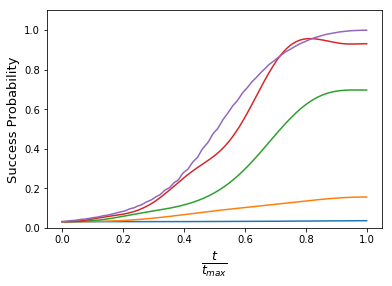

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
np.set_printoptions(threshold=4)

'''M = ([[0,1,0],
     [0,0,1],
     [0,0,0]])'''
M = ([[0,1,1,0,0],
       [0,0,1,0,1],
       [0,0,0,1,1],
       [0,0,0,0,0],
       [0,0,0,0,0]])

J_capital = np.array(M)
h = []
kappa = float(0.9)


def h_calc():
    rows = (np.shape(J_capital)[0])
    columns = (np.shape(J_capital)[1])
    for k in range(rows):
        total = 0
        for j in range(columns):
            x = -1*(M[k][j]+M[j][k])
            total = total + x
        h.append([total+kappa])
    return 

h_calc()

#print(h)
def sigma_z_j(n,j):
    I_1 = np.identity(2**(j-1))
    I_2 = np.identity(2**(n-1-j+1))
    sigma_z = [[1,0],
              [0,-1]]
    first_set = np.kron(I_1,sigma_z) 
    #print(first_set)
    return (np.kron(first_set , I_2))

#print(np.array(sigma_z_j(8,2)))
#print(sigma_z_j(8,2))

def sigma_x_j(n,j):
    I_1 = np.identity(2**(j-1))
    I_2 = np.identity(2**(n-1-j+1))
    sigma_x = [[0,1],
              [1,0]]
    first_set = np.kron(I_1,sigma_x) 
    #print(first_set)
    return (np.kron(first_set , I_2))


def H_ising1(n):
    J_rows = (np.shape(J_capital)[0])
    J_columns = (np.shape(J_capital)[1])
    #print (J_rows)
    x = np.zeros((2**n,2**n))
    for i in range (J_rows):
        for j in range(i+1,J_columns):
            x = J_capital[i][j]*np.array(sigma_z_j(n,i+1))*np.array(sigma_z_j(n,j+1)) + x
            #print(x)
    return x
                     
def H_ising2(n):
    h_rows = (np.shape(h)[0])
    #print(h_rows)
    y = np.zeros((2**n,2**n))
    #print(y)
    for i in range (h_rows):
        #print(h[j][0])
        #print('Sigma _z_ j of',(j+1),'is\n', sigma_z_j(3,j+1))
        #print(np.array([sigma_z_j(3,j)]))
        y = h[i][0]*np.array(sigma_z_j(n,i+1)) + y
        #print('H_j * Sigma_z_j is\n',y)   
    return y

def total_H(n):
    return H_ising1(n)+H_ising2(n)

total_H(5)

def min_Value(n):
    return np.where(total_H(n) == np.min(total_H(n)))

def ground_state(n):
    bit_flip = 1/(np.sqrt(2))*np.array([[1],
                                  [1]])
    first = bit_flip
    for i in range(n-1):
        first = np.kron(first,bit_flip)
    return first

def H_timeDependent1(n,t):
    #t = float()
    t_max = 25
    x = t/t_max
    A = 1-x
    B = x
    first_term = np.zeros((2**n,2**n))
    
    for j in range(n):
        first_term = np.array(sigma_x_j(n,j+1)) + first_term
        #print(first_term)
    
    #print('The sigma_x_j is \n', first_term)
    #print('H prob is \n', total_H(n))
    total = (first_term*(-A) + total_H(n)*(B))
    #print('Total is \n', total)
    
    
    return total

H_timeDependent1(5,1)
    
def exponents1(n):
    q = 250
    #k = np.shape(H_timeDependent(n,)[0])
    t_max = 1
    i = 1j
    exponents_term = expm(i*(t_max/q)*H_timeDependent1(n,(t_max/q)))
    j=0
    horizontal = []
    y = []
    time = 0
    
    while (time/t_max)<1:
        time = j*t_max/q
        horizontal.append(time/t_max)
        exponents_term = np.dot(expm(i*(t_max/q)*H_timeDependent1(n,(time))),exponents_term)
        z = np.dot(exponents_term,ground_state(n))
        y.append(np.abs(z[19])**2)
        #print('the',j,' sum is \n',exponents)
        j += 1
        
    
    #print('the final exponent is \n', exponents_term)
    #print(np.shape(exponents))
    #print(ground_state(n))
    final_amplitude = np.dot(exponents_term,ground_state(n))
    #final_amplitudeTest = exponents_term * ground_state(n)
    #print(horizontal)
    #print(y)
    #print(np.shape(exponents_term))
    #print(np.where(exponents_term == np.min(exponents_term)))
    #print(np.where(final_amplitudeTest == np.min(final_amplitudeTest)))
    #print(np.linalg.norm(exponents_term))
    #print(np.linalg.norm(final_amplitude))
    #print(np.abs(final_amplitude[19]))
    plt.plot(horizontal, y, label = "$t_{max}=1$")
    axes = plt.gca()
    axes.set_ylim([0,1.1])
    return horizontal,y


def H_timeDependent2(n,t):
    #t = float()
    t_max = 2
    x = t/t_max
    A = 1-x
    B = x
    first_term = np.zeros((2**n,2**n))
    
    for j in range(n):
        first_term = np.array(sigma_x_j(n,j+1)) + first_term
        #print(first_term)
    
    #print('The sigma_x_j is \n', first_term)
    #print('H prob is \n', total_H(n))
    total = (first_term*(-A) + total_H(n)*(B))
    #print('Total is \n', total)
    
    return total
    
def exponents2(n):
    q = 250
    #k = np.shape(H_timeDependent(n,)[0])
    t_max = 2
    i = 1j
    exponents_term = expm(i*(t_max/q)*H_timeDependent2(n,(t_max/q)))
    j=0
    horizontal = []
    y = []
    time = 0
    
    while (time/t_max)<1:
        time = j*t_max/q
        horizontal.append(time/t_max)
        exponents_term = np.dot(expm(i*(t_max/q)*H_timeDependent2(n,(time))),exponents_term)
        z = np.dot(exponents_term,ground_state(n))
        y.append(np.abs(z[19])**2)
        #print('the',j,' sum is \n',exponents)
        j += 1
        
    
    #print('the final exponent is \n', exponents_term)
    #print(np.shape(exponents))
    #print(ground_state(n))
    final_amplitude = np.dot(exponents_term,ground_state(n))
    #final_amplitudeTest = exponents_term * ground_state(n)
    #print(horizontal)
    #print(y)
    #print(np.shape(exponents_term))
    #print(np.where(exponents_term == np.min(exponents_term)))
    #print(np.where(final_amplitudeTest == np.min(final_amplitudeTest)))
    #print(np.linalg.norm(exponents_term))
    #print(np.linalg.norm(final_amplitude))
    #print(np.abs(final_amplitude[19]))
    plt.plot(horizontal, y, label = "$t_{max}=2$")
    axes = plt.gca()
    axes.set_ylim([0,1.1])
    return horizontal,y

def H_timeDependent5(n,t):
    #t = float()
    t_max = 5
    x = t/t_max
    A = 1-x
    B = x
    first_term = np.zeros((2**n,2**n))
    
    for j in range(n):
        first_term = np.array(sigma_x_j(n,j+1)) + first_term
        #print(first_term)
    
    #print('The sigma_x_j is \n', first_term)
    #print('H prob is \n', total_H(n))
    total = (first_term*(-A) + total_H(n)*(B))
    #print('Total is \n', total)
    
    return total
    
def exponents5(n):
    q = 250
    #k = np.shape(H_timeDependent(n,)[0])
    t_max = 5
    i = 1j
    exponents_term = expm(i*(t_max/q)*H_timeDependent5(n,(t_max/q)))
    j=0
    horizontal = []
    y = []
    time = 0
    
    while (time/t_max)<1:
        time = j*t_max/q
        horizontal.append(time/t_max)
        exponents_term = np.dot(expm(i*(t_max/q)*H_timeDependent5(n,(time))),exponents_term)
        z = np.dot(exponents_term,ground_state(n))
        y.append(np.abs(z[19])**2)
        #print('the',j,' sum is \n',exponents)
        j += 1
        
    
    #print('the final exponent is \n', exponents_term)
    #print(np.shape(exponents))
    #print(ground_state(n))
    final_amplitude = np.dot(exponents_term,ground_state(n))
    #final_amplitudeTest = exponents_term * ground_state(n)
    #print(horizontal)
    #print(y)
    #print(np.shape(exponents_term))
    #print(np.where(exponents_term == np.min(exponents_term)))
    #print(np.where(final_amplitudeTest == np.min(final_amplitudeTest)))
    #print(np.linalg.norm(exponents_term))
    #print(np.linalg.norm(final_amplitude))
    #print(np.abs(final_amplitude[19]))
    plt.plot(horizontal, y, label = "$t_{max}=5$")
    axes = plt.gca()
    axes.set_ylim([0,1.1])
    return horizontal,y

def H_timeDependent10(n,t):
    #t = float()
    t_max = 10
    x = t/t_max
    A = 1-x
    B = x
    first_term = np.zeros((2**n,2**n))
    
    for j in range(n):
        first_term = np.array(sigma_x_j(n,j+1)) + first_term
        #print(first_term)
    
    #print('The sigma_x_j is \n', first_term)
    #print('H prob is \n', total_H(n))
    total = (first_term*(-A) + total_H(n)*(B))
    #print('Total is \n', total)
    
    return total
    
def exponents10(n):
    q = 250
    #k = np.shape(H_timeDependent(n,)[0])
    t_max = 10
    i = 1j
    exponents_term = expm(i*(t_max/q)*H_timeDependent10(n,(t_max/q)))
    j=0
    horizontal = []
    y = []
    time = 0
    
    while (time/t_max)<1:
        time = j*t_max/q
        horizontal.append(time/t_max)
        exponents_term = np.dot(expm(i*(t_max/q)*H_timeDependent10(n,(time))),exponents_term)
        z = np.dot(exponents_term,ground_state(n))
        y.append(np.abs(z[19])**2)
        #print('the',j,' sum is \n',exponents)
        j += 1
        
    
    #print('the final exponent is \n', exponents_term)
    #print(np.shape(exponents))
    #print(ground_state(n))
    final_amplitude = np.dot(exponents_term,ground_state(n))
    #final_amplitudeTest = exponents_term * ground_state(n)
    #print(horizontal)
    #print(y)
    #print(np.shape(exponents_term))
    #print(np.where(exponents_term == np.min(exponents_term)))
    #print(np.where(final_amplitudeTest == np.min(final_amplitudeTest)))
    #print(np.linalg.norm(exponents_term))
    #print(np.linalg.norm(final_amplitude))
    #print(np.abs(final_amplitude[19]))
    plt.plot(horizontal, y, label = "$t_{max}=10$")
    axes = plt.gca()
    axes.set_ylim([0,1.1])
    return horizontal,y

def H_timeDependent100(n,t):
    #t = float()
    t_max = 100
    x = t/t_max
    A = 1-x
    B = x
    first_term = np.zeros((2**n,2**n))
    
    for j in range(n):
        first_term = np.array(sigma_x_j(n,j+1)) + first_term
        #print(first_term)
    
    #print('The sigma_x_j is \n', first_term)
    #print('H prob is \n', total_H(n))
    total = (first_term*(-A) + total_H(n)*(B))
    #print('Total is \n', total)
    
    return total
    
def exponents100(n):
    q = 250
    #k = np.shape(H_timeDependent(n,)[0])
    t_max = 100
    i = 1j
    exponents_term = expm(i*(t_max/q)*H_timeDependent100(n,(t_max/q)))
    j=0
    horizontal = []
    y = []
    time = 0
    
    while (time/t_max)<1:
        time = j*t_max/q
        horizontal.append(time/t_max)
        exponents_term = np.dot(expm(i*(t_max/q)*H_timeDependent100(n,(time))),exponents_term)
        z = np.dot(exponents_term,ground_state(n))
        y.append(np.abs(z[19])**2)
        #print('the',j,' sum is \n',exponents)
        j += 1
        
    
    #print('the final exponent is \n', exponents_term)
    #print(np.shape(exponents))
    #print(ground_state(n))
    final_amplitude = np.dot(exponents_term,ground_state(n))
    #final_amplitudeTest = exponents_term * ground_state(n)
    #print(horizontal)
    #print(y)
    #print(np.shape(exponents_term))
    #print(np.where(exponents_term == np.min(exponents_term)))
    #print(np.where(final_amplitudeTest == np.min(final_amplitudeTest)))
    #print(np.linalg.norm(exponents_term))
    #print(np.linalg.norm(final_amplitude))
    #print(np.abs(final_amplitude[19]))
    plt.plot(horizontal, y, label = "$t_{max}=100$")
    axes = plt.gca()
    axes.set_ylim([0,1.1])
    return horizontal,y


#print(total_H(5))
#print(np.shape(total_H(5))[0])
#print(min_Value(5))
#print('H prob is \n', total_H(3))


def graph():
    fig = plt.figure()
    ax = fig.add_subplot(111)
    first_x, first_y = exponents1(5)
    second_x, second_y = exponents2(5)
    third_x, third_y = exponents5(5)
    fourth_x, fourth_y = exponents10(5)
    fifth_x, fifth_y = exponents100(5)
    plt.xlabel(r'$\frac{t}{t_{max}}$', fontsize=18)
    plt.ylabel("Success Probability", fontsize=13)
    #leg = plt.legend(loc="upper left", framealpha=0)
    #for text in leg.get_texts():
        #plt.setp(text, color = 'w')
    plt.savefig('AQCkappa9.pdf', dpi=100, bbox_inches = "tight", facecolor=fig.get_facecolor())
    plt.show()
    

graph()

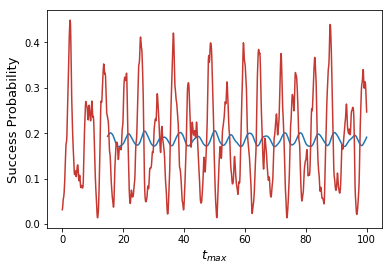

[0.03125]
[0.03332085]
[0.03549104]
[0.03775992]
[0.04012631]
[0.04258849]
[0.04514419]
[0.04779063]
[0.05052452]
[0.05334211]
[0.05623923]
[0.05921128]
[0.06225335]
[0.06536022]
[0.06852641]
[0.07174623]
[0.07501385]
[0.07832326]
[0.08166843]
[0.08504321]
[0.08844144]
[0.09185698]
[0.09528366]
[0.09871535]
[0.10214596]
[0.10556946]
[0.10897985]
[0.11237122]
[0.11573771]
[0.11907355]
[0.12237304]
[0.12563058]
[0.12884067]
[0.13199793]
[0.1350971]
[0.13813305]
[0.14110084]
[0.14399568]
[0.14681299]
[0.1495484]
[0.15219778]
[0.15475728]
[0.15722329]
[0.15959253]
[0.16186204]
[0.16402919]
[0.16609167]
[0.16804758]
[0.16989536]
[0.17163383]
[0.17326219]
[0.17478002]
[0.17618729]
[0.1774843]
[0.17867173]
[0.1797506]
[0.18072224]
[0.1815883]
[0.18235069]
[0.18301154]
[0.1835732]
[0.18403815]
[0.18440889]
[0.18468775]
[0.1848765]
[0.18497599]
[0.1849971]
[0.18514424]
[0.18504006]
[0.18480875]
[0.18453804]
[0.1842159]
[0.18384024]
[0.1834124]
[0.18293487]
[0.18241056]
[0.18184256]
[0.18123397]

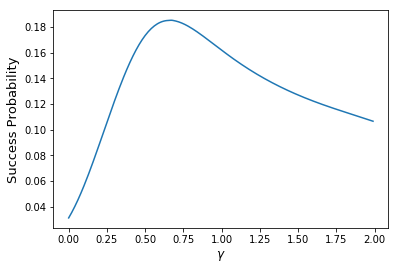

In [4]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
import pandas as pd
from scipy.linalg import eig
np.set_printoptions(threshold=sys.maxsize)

'''M = ([[0,1,0],
     [0,0,1],
     [0,0,0]])'''
M = ([[0,1,1,0,0],
       [0,0,1,0,1],
       [0,0,0,1,1],
       [0,0,0,0,0],
       [0,0,0,0,0]])

J_capital = np.array(M)
h = []
kappa = float(0.5)


def h_calc():
    rows = (np.shape(J_capital)[0])
    columns = (np.shape(J_capital)[1])
    for k in range(rows):
        total = 0
        for j in range(columns):
            x = -1*(M[k][j]+M[j][k])
            total = total + x
        h.append([total+kappa])
    return 

h_calc()

#print(h)
def sigma_z_j(n,j):
    I_1 = np.identity(2**(j-1))
    I_2 = np.identity(2**(n-1-j+1))
    sigma_z = [[1,0],
              [0,-1]]
    first_set = np.kron(I_1,sigma_z) 
    #print(first_set)
    return (np.kron(first_set , I_2))

#print(np.array(sigma_z_j(8,2)))
#print(sigma_z_j(8,2))

def sigma_x_j(n,j):
    I_1 = np.identity(2**(j-1))
    I_2 = np.identity(2**(n-1-j+1))
    sigma_x = [[0,1],
              [1,0]]
    first_set = np.kron(I_1,sigma_x) 
    #print(first_set)
    return (np.kron(first_set , I_2))


def H_ising1(n):
    J_rows = (np.shape(J_capital)[0])
    J_columns = (np.shape(J_capital)[1])
    #print (J_rows)
    x = np.zeros((2**n,2**n))
    for i in range (J_rows):
        for j in range(i+1,J_columns):
            x = J_capital[i][j]*np.array(sigma_z_j(n,i+1))*np.array(sigma_z_j(n,j+1)) + x
            #print(x)
    return x
                     
def H_ising2(n):
    h_rows = (np.shape(h)[0])
    #print(h_rows)
    y = np.zeros((2**n,2**n))
    #print(y)
    for i in range (h_rows):
        #print(h[j][0])
        #print('Sigma _z_ j of',(j+1),'is\n', sigma_z_j(3,j+1))
        #print(np.array([sigma_z_j(3,j)]))
        y = h[i][0]*np.array(sigma_z_j(n,i+1)) + y
        #print('H_j * Sigma_z_j is\n',y)   
    return y

def total_H(n):
    return H_ising1(n)+H_ising2(n)

def normalised_H_ground(n):
    norm = np.linalg.norm(total_H(n)[19])
    return total_H(n)[19]/norm
    

def min_ValuePos(n):
    return np.where(total_H(n) == np.min(total_H(n)))

def min_Value(n):
    array = normalised_H(n)
    return normalised_H(n)[19][19]

def ground_state(n):
    bit_flip = 1/(np.sqrt(2))*np.array([[1],
                                  [1]])
    first = bit_flip
    for i in range(n-1):
        first = np.kron(first,bit_flip)
    return first

def H_QW(n,gamma):
    first_term = np.zeros((2**n,2**n))
    
    for j in range(n):
        first_term = np.array(sigma_x_j(n,j+1)) + first_term
    total = -gamma*first_term 
    return total
    
def H_QW_total(n,gamma):
    return H_QW(n,gamma) +  total_H(n)

def normalised_QW(n,gamma):
    norm = np.linalg.norm(H_QW_total(n,gamma))
    return H_QW_total(n,gamma)/norm
  

def QW_TE(n,t_max,gamma):
    x_axis = []
    y_axis = []
    test_y = []
    time_averaged = []
    i = 1j
    time = 0
    dt = 0.1
    c = 0
    test_x = []
    
    '''while (time/t_max)<5:
        x_axis.append(time/t_max)
        exponent_term = expm(i*H_QW(n)*time)
        time += 0.1
        z = np.dot(exponent_term,ground_state(n))
        y_axis.append(np.abs(z[19]**2))'''
        
    while time<100:
        x_axis.append(time)
        exponent_term = expm(i*H_QW_total(n,gamma)*time)
        time += 0.1
        z = np.dot(exponent_term,ground_state(n))
        y_axis.append(np.abs(z[19]**2))  

    window_size = 150
    numbers_series = pd.Series(y_axis)
    windows = numbers_series.rolling(window_size)
    moving_averages = windows.mean()
    moving_averages_list = moving_averages.tolist()
    without_nans = moving_averages_list[window_size - 1:] 
    
    
    #print(x_axis)
    #print(without_nans)
    
  
    graph1 = plt.plot(x_axis[(window_size - 1):],without_nans, label = 'Running Average')
    graph2 = plt.plot(x_axis,y_axis, color = '#C53932', label = "Instantaneous")
    plt.xlabel(r'${t_{max}}$', fontsize=13, color ='black')
    plt.ylabel("Success Probability", fontsize=13, color = 'black')
    axis = plt.gca()
    plt.savefig('QW_RuntimeBlack.pdf', dpi=100, bbox_inches = 'tight')
    plt.show()

QW_TE(5,100,0.67)
#average(5,100,0.67)

def average(n,t_max,gamma):
    
    first_sum = 0
    second_sum = 0
    p_inf = 0
    
    E_gamma = eig(H_QW_total(n,gamma))
  
    eigenvector_gamma = E_gamma[1]
    
    total_eigen = np.shape(eigenvector_gamma)[0]

    for i in range(total_eigen): 
        first_sum = np.abs(np.dot(eigenvector_gamma[:,i],ground_state(n)))**2 #same as np.inner 
        #print(first_sum)
        second_sum = np.abs(np.dot(normalised_H_ground(n),eigenvector_gamma[:,i]))**2
        p_inf += first_sum * second_sum
        #print('total is', (total_sum))'''

        
    print(p_inf)
    return p_inf
    #print(sum(test))
    #print('E eigenvaues are', E_gamma[0])
    #print('E eigenvectors are', E_gamma[1])
    #print(ground_state(n))
    #print(eigenvector_gamma[0][1]
    #print(eigenvector_gamma[0])
    #print(total_eigen)
    #print(np.shape(eigenvector_gamma[0]))
    #print(np.shape(ground_state(n)))
    #print(np.shape(normalised_H_ground(n)))
    #print(E_0[1])
    #print(eigenvector)

def Optimal_gamma(n, t_max, gamma):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    gamma = 0 
    x_axis = []
    y_axis = []
        
    while gamma < 2:
        x_axis.append(gamma)
        y_axis.append(average(n,t_max,gamma))
        gamma += 0.01

    print(np.where(y_axis == np.max(y_axis)))
    print(x_axis[67])
    print(x_axis[66])
    plt.plot(x_axis,y_axis)
    plt.xlabel(r'$\gamma$', fontsize=12)
    plt.ylabel("Success Probability", fontsize=13)

    plt.savefig('GammaBlack.pdf', dpi=100, bbox_inches = 'tight')
    plt.show

Optimal_gamma(5,100,0)